### **Project Objective**  

The objective of this project is to segment customers based on their purchasing behavior using RFM (Recency, Frequency, Monetary) analysis.

This analysis aims to identify high-value customers, at-risk customers, and low-engagement customers in order to support data-driven customer retention and marketing strategies.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

sales_data = pd.read_excel(r"C:\Users\Beebrazz\Documents\sales-data-analysis\Superstore.xls")

sales_data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
sales_data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
# Generating the neccessary columns

rfm_df = sales_data[['Customer ID', 'Order Date', 'Sales']].copy()
rfm_df.head()

,Customer ID,Order Date,Sales
0,CG-12520,2016-11-08,261.9600
1,CG-12520,2016-11-08,731.9400
2,DV-13045,2016-06-12,14.6200
3,SO-20335,2015-10-11,957.5775
4,SO-20335,2015-10-11,22.3680


In [6]:
# Converting- Order Date to datetime

rfm_df['Order Date'] = pd.to_datetime(rfm_df['Order Date'])

In [7]:
# Reference date (Assuming analysis is done one day after the last order)

analysis_date = rfm_df['Order Date'].max() + pd.Timedelta(days=1)
analysis_date

Timestamp('2017-12-31 00:00:00')

Data Preparation  

The dataset was cleaned and prepared for RFM analysis by selecting relevant variables, converting order dates to datetime format, and removing records with missing customer identifiers. An analysis reference date was defined to calculate customer recency accurately.

### Building RFM Metrics

In [14]:
#Calculate RFM values

rfm = rfm_df.groupby('Customer ID').agg({
    'Order Date': lambda x: (analysis_date - x.max()).days,
    'Customer ID': 'count',
    'Sales': 'sum'
})#.reset_index()
rfm


,Order Date,Customer ID,Sales
Customer ID,,,
AA-10315,185,11,5563.560
AA-10375,20,15,1056.390
AA-10480,260,12,1790.512
AA-10645,56,18,5086.935
AB-10015,416,6,886.156
...,...,...,...
XP-21865,44,28,2374.658
YC-21895,5,8,5454.350
YS-21880,10,12,6720.444


In [16]:
#Renaming coloumns

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,185,11,5563.560
AA-10375,20,15,1056.390
AA-10480,260,12,1790.512
AA-10645,56,18,5086.935
AB-10015,416,6,886.156


In [17]:
rfm.describe()

,Recency,Frequency,Monetary
count,793.000000,793.000000,793.000000
mean,147.802018,12.602774,2896.848500
std,186.211051,6.242559,2628.670117
min,1.000000,1.000000,4.833000
25%,31.000000,8.000000,1146.050000
50%,76.000000,12.000000,2256.394000
75%,184.000000,16.000000,3785.276000
max,1166.000000,37.000000,25043.050000


RFM Metrics Calculation  

Recency was calculated as the number of days since a customer’s most recent purchase. Frequency represents the total number of transactions made by each customer, while Monetary reflects the total revenue generated by each customer. These metrics form the basis for customer segmentation and retention analysis.

### RFM Scoring & Customer Segmentation

In [ ]:
# Creating R, F, M scores

rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

'''
Note:
Lower recency = better → higher score
Higher frequency & monetary = better → higher score
'''

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
Customer ID,,,,,,
AA-10315,185,11,5563.560,1,2,4
AA-10375,20,15,1056.390,4,3,1
AA-10480,260,12,1790.512,1,2,2
AA-10645,56,18,5086.935,3,4,4
AB-10015,416,6,886.156,1,1,1


In [ ]:
# Converting scores to integer

rfm[['R_Score', 'F_Score', 'M_Score']] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int)


In [22]:
# Creating overall RFM score
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
Customer ID,,,,,,,
AA-10315,185,11,5563.560,1,2,4,7
AA-10375,20,15,1056.390,4,3,1,8
AA-10480,260,12,1790.512,1,2,2,5
AA-10645,56,18,5086.935,3,4,4,11
AB-10015,416,6,886.156,1,1,1,3


RFM Scoring  
Customers were scored using quartile-based segmentation. Recency, Frequency, and Monetary values were converted into scores ranging from 1 to 4, where higher scores indicate more valuable customer behavior. The combined RFM score was used to classify customers into meaningful segments.

### Customer Segment Labeling

In [23]:
def segment_customers(row):
    if row['RFM_Score'] >= 10:
        return 'Champions'
    elif row['RFM_Score'] >= 8:
        return 'Loyal Customers'
    elif row['RFM_Score'] >= 6:
        return 'Potential Loyalists'
    elif row['RFM_Score'] >= 4:
        return 'At Risk'
    else:
        return 'Lost Customers'

rfm['Customer Segment'] = rfm.apply(segment_customers, axis=1)
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Customer Segment
Customer ID,,,,,,,,
AA-10315,185,11,5563.560,1,2,4,7,Potential Loyalists
AA-10375,20,15,1056.390,4,3,1,8,Loyal Customers
AA-10480,260,12,1790.512,1,2,2,5,At Risk
AA-10645,56,18,5086.935,3,4,4,11,Champions
AB-10015,416,6,886.156,1,1,1,3,Lost Customers


In [24]:
# Checking segment distribution

rfm['Customer Segment'].value_counts()

Customer Segment
Potential Loyalists    202
Champions              200
Loyal Customers        189
At Risk                144
Lost Customers          58
Name: count, dtype: int64

Customer Segmentation  
Customers were grouped into meaningful segments based on their combined RFM scores. These segments help identify high-value customers, loyal customers, potential churn risks, and lost customers, enabling targeted retention and engagement strategies.

### Visualizing Customer Segments

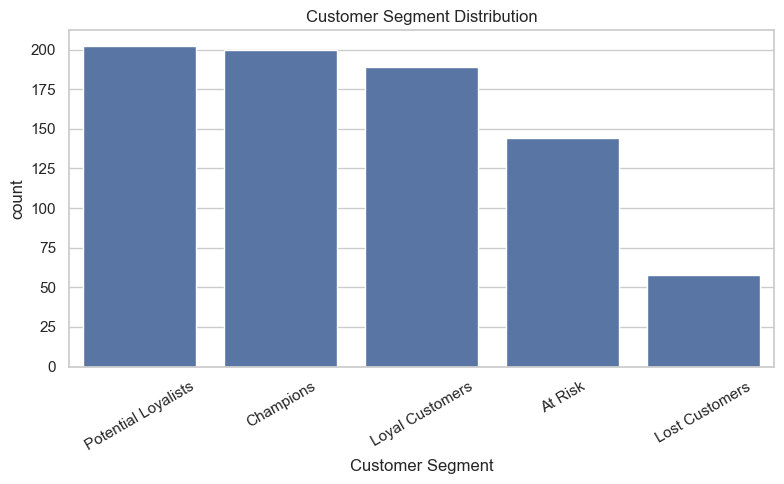

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=rfm,
    x='Customer Segment',
    order=rfm['Customer Segment'].value_counts().index
)
plt.title('Customer Segment Distribution')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Insight:  
The distribution shows that a significant portion of customers fall into the Champions, Loyal and Potential Loyalist segments, while a smaller but important group is classified as At Risk and Lost Customers. This highlights opportunities for targeted retention strategies to reduce churn.

### Analyzing Segment Value

In [26]:
segment_summary = rfm.groupby('Customer Segment')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
segment_summary

,Recency,Frequency,Monetary
Customer Segment,,,
At Risk,241.14,7.24,1132.03
Champions,39.95,19.30,4932.84
Lost Customers,476.41,5.03,498.47
Loyal Customers,104.86,14.36,3790.14
Potential Loyalists,133.88,10.32,1991.95


Segment Performance Analysis  
High-value segments such as Champions and Loyal Customers demonstrate low recency, high purchase frequency, and strong monetary value. In contrast, At Risk and Lost Customers show declining engagement and lower spending, indicating churn risk.

### Key Insights & Findings

A small group of customers classified as Champions and Loyal Customers contributes a disproportionately high share of total revenue, indicating strong repeat purchasing behavior.

Potential Loyalists represent a growth opportunity, as targeted engagement could convert them into high-value customers.

At Risk and Lost Customers show increased recency and lower frequency, suggesting declining engagement and potential churn.

Customer value is unevenly distributed, emphasizing the importance of personalized retention and loyalty strategies.

### Business Recommendations & Actions

Implement loyalty programs and exclusive offers to retain Champions and Loyal Customers.

Design targeted campaigns and personalized discounts to convert Potential Loyalists into repeat buyers.

Re-engage At Risk Customers using win-back promotions and improved customer communication.

Reduce acquisition spending on Lost Customers and focus resources on high-value and recoverable segments.

### Conclusion & Next Steps  

This analysis demonstrates how RFM methodology can be used to segment customers and uncover actionable insights for retention and revenue growth. By focusing on high-value customers and proactively managing churn risk, businesses can optimize marketing strategies and improve long-term profitability.